In [29]:
feature_names = ['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE','DIS', 
                 'RAD', 'TAX', 'PTRATIO', 'B', 'LSTAT', 'MEDV' ]

feature_num = len(feature_names)
data = data.reshape([data.shape[0] // feature_num, feature_num])

x = data[0]
print(x.shape)
print(x)

(14,)
[6.320e-03 1.800e+01 2.310e+00 0.000e+00 5.380e-01 6.575e+00 6.520e+01
 4.090e+00 1.000e+00 2.960e+02 1.530e+01 3.969e+02 4.980e+00 2.400e+01]


In [28]:
import numpy as np
import json

datafile = './data/housing.data'
data = np.fromfile(datafile, sep=' ')
data

array([6.320e-03, 1.800e+01, 2.310e+00, ..., 3.969e+02, 7.880e+00,
       1.190e+01])

In [30]:
ratio = 0.8
offset = int(data.shape[0] * ratio)
training_data = data[:offset]
training_data.shape

(404, 14)

In [31]:
maximums, minimums, avgs = training_data.max(axis=0), training_data.min(axis=0), training_data.sum(axis=0) / training_data.shape[0]

for i in range(feature_num):
    data[:, i] = (data[:, i] - avgs[i]) / (maximums[i] - minimums[i])
    print(maximums[i], minimums[i], avgs[i])

88.9762 0.00632 1.9158993069306929
100.0 0.0 14.232673267326733
25.65 0.46 9.502326732673243
1.0 0.0 0.08663366336633663
0.871 0.385 0.5317319306930701
8.78 3.561 6.3331089108910925
100.0 2.9 64.42747524752477
12.1265 1.1296 4.174213613861384
24.0 1.0 6.78960396039604
666.0 187.0 352.91089108910893
22.0 12.6 18.026237623762338
396.9 70.8 379.97175742574177
37.97 1.73 11.354950495049506
50.0 5.0 24.175742574257452


In [32]:
def load_data():
    # 从文件导入数据
    datafile = './data/housing.data'
    data = np.fromfile(datafile, sep=' ')

    # 每条数据包括14项，其中前面13项是影响因素，第14项是相应的房屋价格中位数
    feature_names = [ 'CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', \
                      'DIS', 'RAD', 'TAX', 'PTRATIO', 'B', 'LSTAT', 'MEDV' ]
    feature_num = len(feature_names)

    # 将原始数据进行Reshape，变成[N, 14]这样的形状
    data = data.reshape([data.shape[0] // feature_num, feature_num])

    # 将原数据集拆分成训练集和测试集
    # 这里使用80%的数据做训练，20%的数据做测试
    # 测试集和训练集必须是没有交集的
    ratio = 0.8
    offset = int(data.shape[0] * ratio)
    training_data = data[:offset]

    # 计算train数据集的最大值，最小值，平均值
    maximums, minimums, avgs = training_data.max(axis=0), training_data.min(axis=0), \
                                 training_data.sum(axis=0) / training_data.shape[0]

    # 对数据进行归一化处理
    for i in range(feature_num):
        #print(maximums[i], minimums[i], avgs[i])
        data[:, i] = (data[:, i] - avgs[i]) / (maximums[i] - minimums[i])

    # 训练集和测试集的划分比例
    training_data = data[:offset]
    test_data = data[offset:]
    return training_data, test_data

In [33]:
training_data, test_data = load_data()
x = training_data[:, :-1]
y = training_data[:, -1:]

In [34]:
w = [0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, -0.1, -0.2, -0.3, -0.4, 0.0]
w = np.array(w).reshape([13, 1])

In [36]:
x1=x[0]
t = np.dot(x1, w)
print(t)

[0.03395597]


In [39]:
b = -0.2
z = t + b
print(z)

[-0.16604403]


In [40]:
class Network(object):
    def __init__(self, num_of_weights):
        np.random.seed(0)
        self.w = np.random.randn(num_of_weights, 1)
        self.b = 0.
        
    def forward(self, x):
        z = np.dot(x, self.w) + self.b
        return z

In [42]:
net = Network(13)
x1 = x[0]
y1 = y[0]
z = net.forward(x1)
print(z)

[-0.63182506]


In [44]:
Loss = (y1 - z) * (y1 - z)
print(Loss)

[0.39428312]


In [45]:
class Network(object):
    def __init__(self, num_of_weights):
        # 随机产生w的初始值
        # 为了保持程序每次运行结果的一致性，此处设置固定的随机数种子
        np.random.seed(0)
        self.w = np.random.randn(num_of_weights, 1)
        self.b = 0.
        
    def forward(self, x):
        z = np.dot(x, self.w) + self.b
        return z
    
    def loss(self, z, y):
        error = z - y
        cost = error * error
        cost = np.mean(cost)
        return cost

In [47]:
net = Network(13)
x1 = x[0:3]
y1 = y[0:3]
z = net.forward(x1)
print('predict:', z)
loss = net.loss(z, y1)
print('loss:', loss)

predict: [[-0.63182506]
 [-0.55793096]
 [-1.00062009]]
loss: 0.7229825055441156


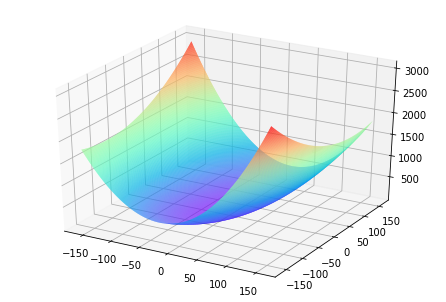

In [58]:
net = Network(13)
losses = []
#只画出参数w5和w9在区间[-160, 160]的曲线部分，以及包含损失函数的极值
w5 = np.arange(-160.0, 160.0, 1.0)
w9 = np.arange(-160.0, 160.0, 1.0)
losses = np.zeros([len(w5), len(w9)])

#计算设定区域内每个参数取值所对应的Loss
for i in range(len(w5)):
    for j in range(len(w9)):
        net.w[5] = w5[i]
        net.w[9] = w9[j]
        z = net.forward(x)
        loss = net.loss(z, y)
        losses[i, j] = loss

#使用matplotlib将两个变量和对应的Loss作3D图
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
fig = plt.figure()
ax = Axes3D(fig)

w5, w9 = np.meshgrid(w5, w9)

ax.plot_surface(w5, w9, losses, rstride=1, cstride=1, cmap='rainbow')
plt.show()

In [61]:

x1 = x[0]
y1 = y[0]
z1 = net.forward(x1)
print('x1 {}, shape {}'.format(x1, x1.shape))
print('y1 {}, shape {}'.format(y1, y1.shape))
print('z1 {}, shape {}'.format(z1, z1.shape))

x1 [-0.02146321  0.03767327 -0.28552309 -0.08663366  0.01289726  0.04634817
  0.00795597 -0.00765794 -0.25172191 -0.11881188 -0.29002528  0.0519112
 -0.17590923], shape (13,)
y1 [-0.00390539], shape (1,)
z1 [-12.05947643], shape (1,)


In [63]:
gradient_w0 = (z1 - y1) * x1[0]
print('gradient_w0 {}'.format(gradient_w0))

gradient_w0 [0.25875126]


In [65]:
gradient_w = (z1 - y1) * x1
print('gradient_w_by_sample1 {}, gradient.shape {}'.format(gradient_w, gradient_w.shape))

gradient_w_by_sample1 [ 0.25875126 -0.45417275  3.44214394  1.04441828 -0.15548386 -0.55875363
 -0.09591377  0.09232085  3.03465138  1.43234507  3.49642036 -0.62581917
  2.12068622], gradient.shape (13,)
